# Imports

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import recall_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [2]:
data = pd.read_csv('./data_collection/prepared_twitter_sentiment_data.csv', index_col=0)

In [3]:
# Drop 31 missing values from messages column
data.dropna(inplace=True)

# TFIDF Vectorization

In [4]:
# Get X and y for Vectorization
X = data.message
y = data.sentiment

In [5]:
# Test train split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# Create TFIDF Vectorizer including unigrams through trigrams
tfidf = TfidfVectorizer(ngram_range= (1,3))
# Fitting and transforming X_train with TFIDF Vectorizer
tfidf_train = tfidf.fit_transform(X_train)
# Transforming X_test with TFIDF Vectorizer
tfidf_test = tfidf.transform(X_test)

# KNN Model

In [6]:
# Creating instance of KNeighborsClassifier
knn = KNeighborsClassifier()
# Fitting training data to KNeighborsClassifier
base_knn_model = knn.fit(tfidf_train, y_train)
# Predicting on test data with KNeighborsClassifier
base_preds = base_knn_model.predict(tfidf_test)

# Evaluation

In [7]:
# Classification Report for KNeighborsClassifier model
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

          -1       0.46      0.39      0.42       823
           0       0.41      0.49      0.44      1549
           1       0.70      0.70      0.70      4526
           2       0.61      0.54      0.57      1885

    accuracy                           0.60      8783
   macro avg       0.54      0.53      0.53      8783
weighted avg       0.60      0.60      0.60      8783



Baseline KNN Confusion Matrix
[[ 320  232  207   64]
 [ 122  758  535  134]
 [ 219  695 3166  446]
 [  42  186  638 1019]]
Baseline KNN Confusion Matrix (Normalized)
[[0.38882139 0.2818955  0.25151883 0.07776428]
 [0.07876049 0.48934797 0.34538412 0.08650742]
 [0.0483871  0.15355722 0.69951392 0.09854176]
 [0.02228117 0.09867374 0.33846154 0.54058355]]


<Figure size 1440x720 with 0 Axes>

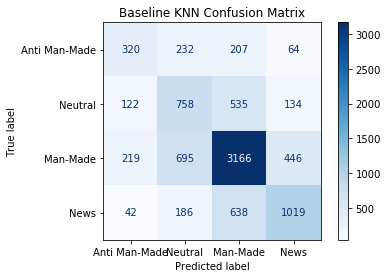

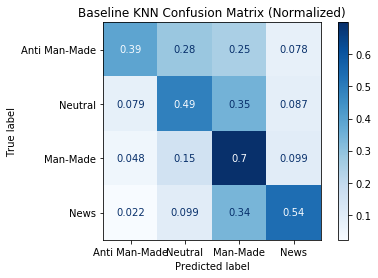

In [10]:
# Setting class names for confusion matrix
class_names = ['Anti Man-Made', 'Neutral', 'Man-Made', 'News']

# Plotting confusion matrixes
plt.figure(figsize=(20,10))
titles_options = [("Baseline KNN Confusion Matrix", None),
                  ("Baseline KNN Confusion Matrix (Normalized)", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, tfidf_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
  

plt.show()